# Лабораторная работа №8 (Проведение исследований моделями обнаружения и распознавания объектов)



Выбран vehicle dataset так как:
+ Обученная модель может быть использованя для систем видеонаблюдения или интеллектуальных транспортных систем
+ Датасет предназначен именно для YOLO моделей

Для оценки качества обучения были выбраны следующие метрики:

+ mAP@0.5 - среднюю точность модели при пороге пересечения
+ Recall - насколько хорошо модель находит все объекты в изображении


In [1]:
!pip install -q kaggle


In [3]:
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_files('nadinpethiyagoda/vehicle-dataset-for-yolo', path='vehicle_dataset', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/nadinpethiyagoda/vehicle-dataset-for-yolo


In [8]:
import yaml

data_yaml = {
    'train': '/content/vehicle_dataset/vehicle dataset/train/images',
    'val': '/content/vehicle_dataset/vehicle dataset/valid/images',
    'nc': 6,
    'names': ['car', 'truck', 'bus', 'motorcycle', 'bicycle', 'van']
}

with open('/content/vehicle_dataset/vehicle dataset/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)


In [7]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

# YOLO бейзлайн

In [12]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(data='/content/vehicle_dataset/vehicle dataset/data.yaml', epochs=5, imgsz=640)


Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vehicle_dataset/vehicle dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

train: Scanning /content/vehicle_dataset/vehicle dataset/train/labels.cache... 2100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2100/2100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 469.9±192.7 MB/s, size: 183.8 KB)


val: Scanning /content/vehicle_dataset/vehicle dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]

val: /content/vehicle_dataset/vehicle dataset/valid/images/car55.jpg: corrupt JPEG restored and saved


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.53G     0.6336      2.154      1.145         20        640: 100%|██████████| 132/132 [00:44<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.49it/s]


                   all        900       1150      0.768      0.706      0.832      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.37G     0.6314      1.387       1.13         15        640: 100%|██████████| 132/132 [00:44<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.11it/s]


                   all        900       1150      0.779      0.775      0.832      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.37G     0.6417      1.214      1.131         11        640: 100%|██████████| 132/132 [00:42<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]


                   all        900       1150      0.846      0.825      0.902      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.39G      0.593      1.062      1.107         11        640: 100%|██████████| 132/132 [00:42<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.00it/s]


                   all        900       1150      0.906      0.848      0.935       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.39G     0.5223     0.8856      1.061         11        640: 100%|██████████| 132/132 [00:42<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.11it/s]


                   all        900       1150      0.946      0.882      0.962      0.849

5 epochs completed in 0.075 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.72it/s]


                   all        900       1150      0.945      0.882      0.962      0.849
                   car        182        201      0.947       0.91      0.966      0.915
                 truck        167        227      0.965       0.86      0.965      0.823
                   bus        162        185      0.929      0.978      0.987      0.903
            motorcycle        123        151      0.984        0.8      0.951       0.83
               bicycle        165        216      0.947      0.826      0.941      0.718
                   van        157        170      0.895      0.918      0.962      0.903
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8100f93dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# Результаты

In [14]:
import numpy as np


metrics = model.val()
print(f"Validation Results:")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")

print(f"Average Precision: {np.mean(metrics.box.p):.4f}")
print(f"Average Recall: {np.mean(metrics.box.r):.4f}")

print("\nPrecision по классам:")
for i, p in enumerate(metrics.box.p):
    class_name = metrics.names[i] if i in metrics.names else f"Класс {i}"
    print(f"  {class_name}: {p:.4f}")

print("\nRecall по классам:")
for i, r in enumerate(metrics.box.r):
    class_name = metrics.names[i] if i in metrics.names else f"Класс {i}"
    print(f"  {class_name}: {r:.4f}")

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2364.6±760.8 MB/s, size: 124.6 KB)


val: Scanning /content/vehicle_dataset/vehicle dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]

val: /content/vehicle_dataset/vehicle dataset/valid/images/car55.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [00:13<00:00,  4.35it/s]


                   all        900       1150      0.948       0.88      0.962      0.848
                   car        182        201      0.945       0.91      0.965      0.916
                 truck        167        227       0.96      0.854      0.964      0.823
                   bus        162        185      0.931      0.978      0.987      0.903
            motorcycle        123        151      0.984      0.795      0.951      0.826
               bicycle        165        216      0.962      0.821       0.94      0.717
                   van        157        170      0.904      0.924      0.964      0.903
Speed: 0.4ms preprocess, 3.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train53
Validation Results:
mAP@0.5: 0.9620
mAP@0.5:0.95: 0.8481
Average Precision: 0.9477
Average Recall: 0.8803

Precision по классам:
  car: 0.9453
  truck: 0.9603
  bus: 0.9310
  motorcycle: 0.9836
  bicycle: 0.9620
  van: 0.9037

Recall по классам:
  car: 0.910

# mAP@0.5: 0.9620 Average Recall: 0.8803

# Пример работы

Image 1 predictions:
  Object 1: Class 0 - Confidence: 0.9866 - Coordinates: tensor([386.2556, 293.7290, 697.4500, 484.8806], device='cuda:0')


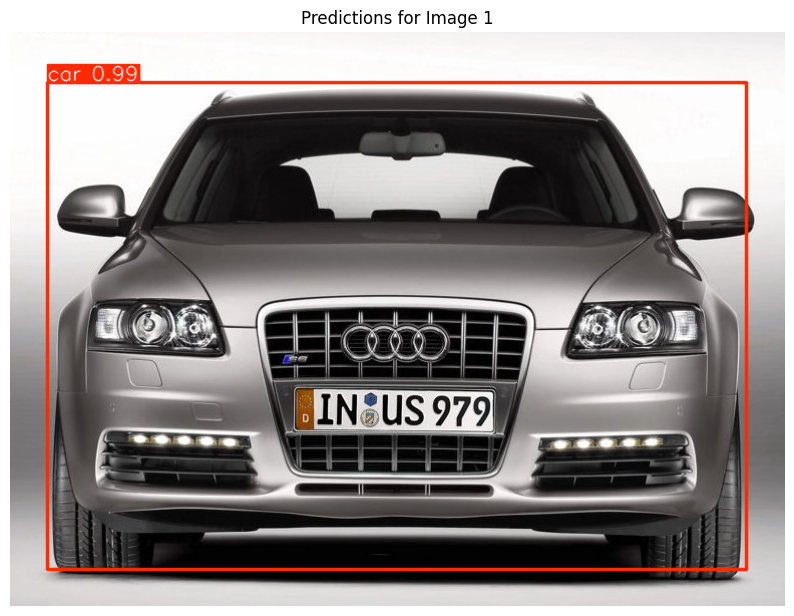

Image 2 predictions:
  Object 1: Class 0 - Confidence: 0.9889 - Coordinates: tensor([306.6907, 240.3784, 458.9581, 255.0965], device='cuda:0')


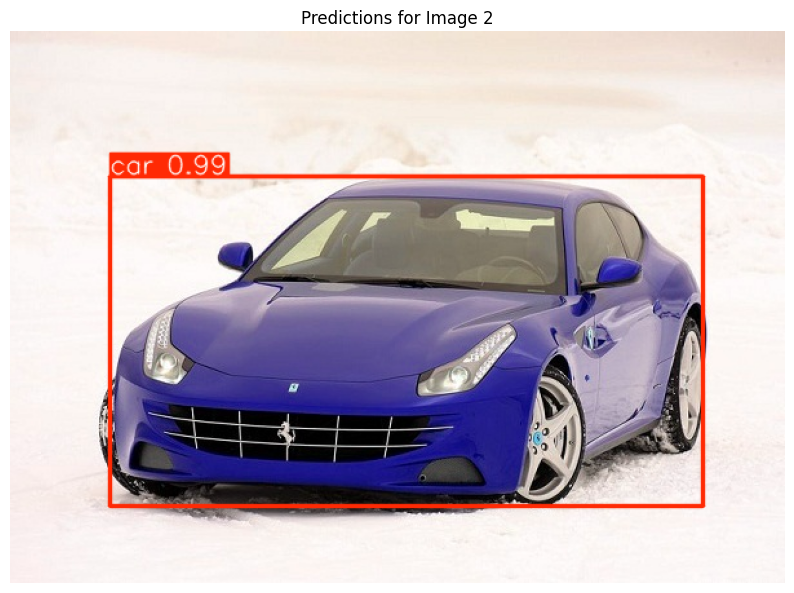

Image 3 predictions:
  Object 1: Class 0 - Confidence: 0.9770 - Coordinates: tensor([311.9796, 285.9772, 501.1887, 220.9613], device='cuda:0')


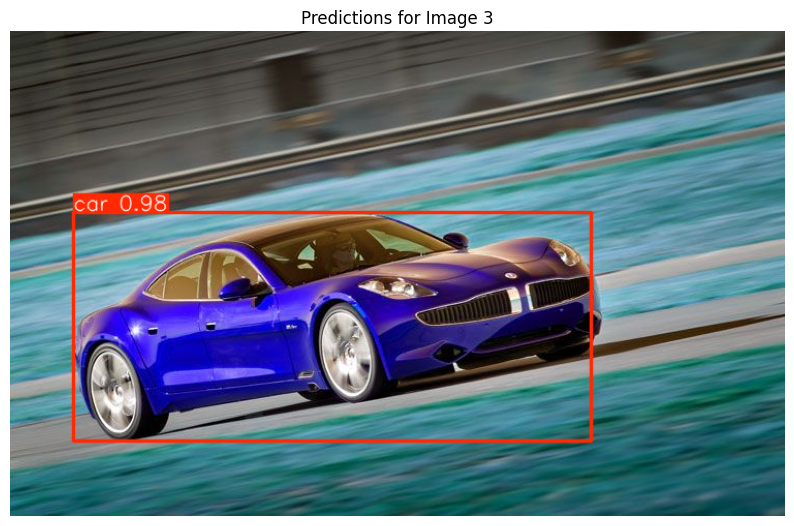

In [18]:
import matplotlib.pyplot as plt

for i, result in enumerate(results[:3]):
    boxes = result.boxes.xywh
    scores = result.boxes.conf
    class_ids = result.boxes.cls

    print(f"Image {i+1} predictions:")
    for j, box in enumerate(boxes):
        print(f"  Object {j+1}: Class {int(class_ids[j])} - Confidence: {scores[j]:.4f} - Coordinates: {box[:4]}")

    plt.figure(figsize=(10, 10))
    plt.imshow(result.plot())
    plt.title(f"Predictions for Image {i+1}")
    plt.axis('off')
    plt.show()


# Вывод
Модель уже показывает очень высокие метрики, так что большой необходимости в улучшении бейзлайна нет, это может привести к переобучению

# Custom YOLO

# Подготовка датасета

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import os
import cv2


In [ ]:
!pip install -q tensorflow opencv-python-headless


# константы

In [ ]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
os.environ["CUDA_VISIBLE_DEVICES"]   = "0"

import tensorflow as tf
print("TF version:", tf.__version__)
print("GPUs detected:", tf.config.list_physical_devices("GPU"))

# Параметры обучения
IMAGE_SIZE   = 224
GRID_SIZE    = 7
NUM_CLASSES  = 6
BATCH_SIZE   = 4
EPOCHS       = 5

BASE_DIR      = "/content/vehicle_dataset/vehicle dataset"
TRAIN_IMG_DIR = os.path.join(BASE_DIR, "train", "images")
TRAIN_LBL_DIR = os.path.join(BASE_DIR, "train", "labels")
VAL_IMG_DIR   = os.path.join(BASE_DIR, "valid", "images")
VAL_LBL_DIR   = os.path.join(BASE_DIR, "valid", "labels")

Преобразование датасета для кастомной реализации

In [6]:
import numpy as np, cv2
from tensorflow.keras.utils import Sequence

class YoloDataGenerator(Sequence):
    def __init__(self, img_dir, lbl_dir, batch_size, img_size, grid_size, num_classes):
        self.img_paths = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.lower().endswith((".jpg",".png"))])
        self.lbl_paths = [os.path.join(lbl_dir, os.path.basename(p).rsplit(".",1)[0] + ".txt") for p in self.img_paths]
        self.batch_size  = batch_size
        self.img_size    = img_size
        self.grid_size   = grid_size
        self.num_classes = num_classes

    def __len__(self):
        return max(1, len(self.img_paths) // self.batch_size)

    def __getitem__(self, idx):
        batch_imgs = []
        batch_lbls = []
        for i in range(self.batch_size):
            img_path = self.img_paths[idx*self.batch_size + i]
            lbl_path = self.lbl_paths[idx*self.batch_size + i]

            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.img_size, self.img_size)) / 255.0
            batch_imgs.append(img.astype(np.float32))

            # YOLO‑таргет: [S, S, 5 + C]
            target = np.zeros((self.grid_size, self.grid_size, 5 + self.num_classes), dtype=np.float32)
            if os.path.exists(lbl_path):
                for line in open(lbl_path):
                    cls, x, y, w, h = map(float, line.strip().split())
                    gx = min(self.grid_size-1, int(x * self.grid_size))
                    gy = min(self.grid_size-1, int(y * self.grid_size))
                    target[gy,gx,0:4] = [x,y,w,h]
                    target[gy,gx,4]   = 1.0
                    target[gy,gx,5+int(cls)] = 1.0
            batch_lbls.append(target)
        return np.stack(batch_imgs), np.stack(batch_lbls)



Создание валидационной и тестировочной выборок

In [7]:
train_gen = YoloDataGenerator(TRAIN_IMG_DIR, TRAIN_LBL_DIR, BATCH_SIZE, IMAGE_SIZE, GRID_SIZE, NUM_CLASSES)
val_gen   = YoloDataGenerator(VAL_IMG_DIR,   VAL_LBL_DIR,   BATCH_SIZE, IMAGE_SIZE, GRID_SIZE, NUM_CLASSES)



Архитектура модели

In [8]:
from tensorflow.keras import layers, Model

def build_yolo_model(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), grid_size=GRID_SIZE, num_classes=NUM_CLASSES):
    inp = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(inp)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(128,3, padding="same", activation="relu")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(grid_size*grid_size*(5+num_classes))(x)
    out = layers.Reshape((grid_size,grid_size,5+num_classes))(x)
    return Model(inp, out)

model = build_yolo_model()
model.summary()

def yolo_loss(y_true, y_pred):
    box_loss   = tf.reduce_mean(tf.square(y_true[...,0:4] - y_pred[...,0:4]))
    obj_loss   = tf.reduce_mean(tf.square(y_true[...,4]   - y_pred[...,4]))
    class_loss = tf.reduce_mean(tf.square(y_true[...,5:]  - y_pred[...,5:]))
    return box_loss + obj_loss + class_loss

model.compile(optimizer="adam", loss=yolo_loss)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 539)            │   216,359,451 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 11)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,452,699 (825.70 MB)

 Trainable params: 216,452,699 (825.70 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - loss: 1.5437 - val_loss: 0.0285
Epoch 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - loss: 0.0282 - val_loss: 0.0286
Epoch 3/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - loss: 0.0248 - val_loss: 0.0296
Epoch 4/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - loss: 0.0223 - val_loss: 0.0292
Epoch 5/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - loss: 0.0196 - val_loss: 0.0299


Расчет метрик

In [12]:
import numpy as np
import cv2

GRID_SIZE   = 7
NUM_CLASSES = 6


# Функция для вычисления IoU двух боксов в относительных координатах [x,y,w,h]
def compute_iou(box1, box2):
    x1_min = box1[0] - box1[2]/2; y1_min = box1[1] - box1[3]/2
    x1_max = box1[0] + box1[2]/2; y1_max = box1[1] + box1[3]/2
    x2_min = box2[0] - box2[2]/2; y2_min = box2[1] - box2[3]/2
    x2_max = box2[0] + box2[2]/2; y2_max = box2[1] + box2[3]/2

    inter_w = max(0, min(x1_max, x2_max) - max(x1_min, x2_min))
    inter_h = max(0, min(y1_max, y2_max) - max(y1_min, y2_min))
    inter   = inter_w * inter_h
    area1   = (x1_max - x1_min) * (y1_max - y1_min)
    area2   = (x2_max - x2_min) * (y2_max - y2_min)
    return inter / (area1 + area2 - inter + 1e-9)

conf_thrs = np.linspace(0, 1, 11)
TP = {thr:0 for thr in conf_thrs}
FP = {thr:0 for thr in conf_thrs}
FN = {thr:0 for thr in conf_thrs}

for batch_idx in range(len(val_gen)):
    imgs, y_true = val_gen[batch_idx]
    y_pred = model.predict(imgs)
    for i in range(imgs.shape[0]):
        gt_boxes = []
        for gi in range(GRID_SIZE):
            for gj in range(GRID_SIZE):
                if y_true[i,gi,gj,4] > 0.5:
                    box = y_true[i,gi,gj,0:4]
                    gt_boxes.append([ (gj+box[0])/GRID_SIZE,
                                      (gi+box[1])/GRID_SIZE,
                                      box[2], box[3] ])
        preds = []
        for gi in range(GRID_SIZE):
            for gj in range(GRID_SIZE):
                conf = y_pred[i,gi,gj,4]
                if conf > 0:
                    box = y_pred[i,gi,gj,0:4]
                    preds.append((conf, [
                        (gj+box[0])/GRID_SIZE,
                        (gi+box[1])/GRID_SIZE,
                        box[2], box[3]
                    ]))
        preds.sort(key=lambda x: x[0], reverse=True)

        for thr in conf_thrs:
            matched = set()
            tp = fp = 0
            for conf, box in preds:
                if conf < thr: break
                best_iou = 0; best_j = -1
                for j, g in enumerate(gt_boxes):
                    if j in matched: continue
                    iou = compute_iou(box, g)
                    if iou > best_iou:
                        best_iou, best_j = iou, j
                if best_iou >= 0.5:
                    tp += 1
                    matched.add(best_j)
                else:
                    fp += 1
            fn = len(gt_boxes) - len(matched)
            TP[thr] += tp
            FP[thr] += fp
            FN[thr] += fn

prec_recall = [(TP[thr]/(TP[thr]+FP[thr]+1e-9),
                TP[thr]/(TP[thr]+FN[thr]+1e-9))
               for thr in conf_thrs]

mAP50 = np.mean([p for p, _ in prec_recall])
recall50 = dict(zip(conf_thrs, [r for _, r in prec_recall]))[0.5]

print(f"mAP@0.5: {mAP50:.4f}")
print(f"Recall: {recall50:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

# mAP@0.5: 0.2274 Recall: 0.0312

# Пример работы

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


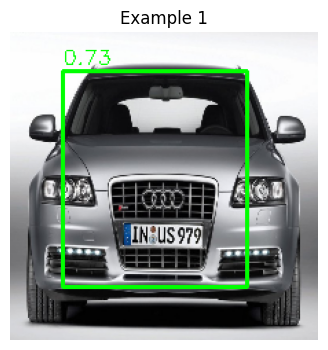

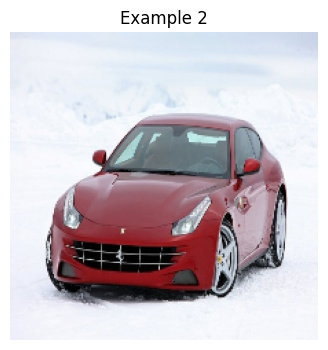

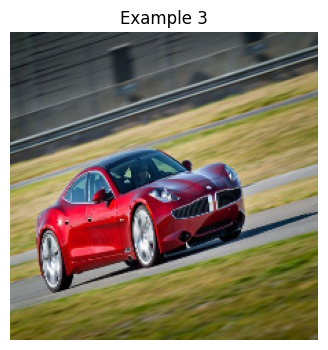

In [11]:
x_batch, y_true = val_gen[0]
y_pred = model.predict(x_batch)

def draw_boxes(img, pred, threshold=0.5, grid_size=7):
    img_h, img_w = img.shape[:2]
    for i in range(grid_size):
        for j in range(grid_size):
            conf = pred[i, j, 4]
            if conf > threshold:
                x, y, w, h = pred[i, j, :4]
                cx = int((j + x) * img_w / grid_size)
                cy = int((i + y) * img_h / grid_size)
                bw = int(w * img_w)
                bh = int(h * img_h)
                x1 = cx - bw//2
                y1 = cy - bh//2
                cv2.rectangle(img, (x1,y1), (x1+bw, y1+bh), (0,255,0), 2)
                cv2.putText(img, f"{conf:.2f}", (x1, y1-5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    return img

import matplotlib.pyplot as plt
for idx in range(3):
    img = (x_batch[idx] * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    out = draw_boxes(img.copy(), y_pred[idx], threshold=0.5)
    plt.figure(figsize=(4,4))
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Example {idx+1}')
    plt.show()

Как видно из метрик и результатов работы, кастомная модель работает плохо и едва может распознать машину даже "в лицо"

# Улучшенный бейзлайн

Попробуем добавить аугментации и увеличить количество слоёв в модели

In [18]:
!pip install -q albumentations


In [19]:
import albumentations as A

class YoloDataGenerator(Sequence):
    def __init__(self, img_dir, lbl_dir, batch_size, img_size, grid_size, num_classes, augment=False):
        self.img_paths = sorted([
            os.path.join(img_dir, f)
            for f in os.listdir(img_dir)
            if f.lower().endswith((".jpg", ".png"))
        ])
        self.lbl_paths = [
            os.path.join(lbl_dir, os.path.splitext(os.path.basename(p))[0] + ".txt")
            for p in self.img_paths
        ]
        self.batch_size  = batch_size
        self.img_size    = img_size
        self.grid_size   = grid_size
        self.num_classes = num_classes
        self.augment     = augment

        # трансформации
        if augment:
            self.transform = A.Compose([
                A.HorizontalFlip(p=0.5),
                A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
                A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
            ],
            bbox_params=A.BboxParams(
                format='yolo',
                label_fields=['class_labels'],
                min_visibility=0.3
            ))
        else:
            self.transform = A.Compose([],
                bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'])
            )

    def __len__(self):
        return max(1, len(self.img_paths) // self.batch_size)

    def __getitem__(self, idx):
        batch_imgs = []
        batch_lbls = []
        start = idx * self.batch_size
        for i in range(self.batch_size):
            img_path = self.img_paths[start + i]
            lbl_path = self.lbl_paths[start + i]

            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            h0, w0 = img.shape[:2]

            bboxes = []
            class_labels = []
            if os.path.exists(lbl_path):
                for line in open(lbl_path):
                    cls, x, y, w, h = map(float, line.strip().split())
                    bboxes.append([x, y, w, h])
                    class_labels.append(int(cls))

            # применяем аугментации
            data = self.transform(
                image=img,
                bboxes=bboxes,
                class_labels=class_labels
            )
            img_tr = cv2.resize(data['image'], (self.img_size, self.img_size))
            img_tr = img_tr.astype(np.float32) / 255.0
            batch_imgs.append(img_tr)

            target = np.zeros((self.grid_size, self.grid_size, 5 + self.num_classes), dtype=np.float32)
            for bbox, cls in zip(data['bboxes'], data['class_labels']):
                x, y, w, h = bbox
                gx = min(self.grid_size - 1, int(x * self.grid_size))
                gy = min(self.grid_size - 1, int(y * self.grid_size))
                target[gy, gx, 0:4] = [x, y, w, h]
                target[gy, gx, 4]   = 1.0
                target[gy, gx, 5 + cls] = 1.0

            batch_lbls.append(target)

        return np.stack(batch_imgs), np.stack(batch_lbls)


In [20]:
from tensorflow.keras import layers, Model

def conv_block(x, filters, kernel=3, stride=1):
    x = layers.Conv2D(filters, kernel, strides=stride, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    return x

def build_yolo_model(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),
                     grid_size=GRID_SIZE, num_classes=NUM_CLASSES):
    inp = layers.Input(shape=input_shape)
    x = conv_block(inp, 32)
    x = layers.MaxPooling2D(2)(x)
    x = conv_block(x, 64)
    x = layers.MaxPooling2D(2)(x)
    x = conv_block(x, 128)
    x = conv_block(x, 128)
    x = layers.MaxPooling2D(2)(x)
    x = conv_block(x, 256)
    x = conv_block(x, 256)
    x = layers.MaxPooling2D(2)(x)
    x = conv_block(x, 512)
    x = conv_block(x, 512)
    x = layers.MaxPooling2D(2)(x)

    x = conv_block(x, 1024)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(5 + num_classes, 1, padding="same", activation="sigmoid")(x)
    out = layers.Reshape((grid_size, grid_size, 5 + num_classes))(x)
    return Model(inp, out)

model = build_yolo_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 256)    │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 28, 28, 256)    │             

 Total params: 9,405,675 (35.88 MB)

 Trainable params: 9,399,851 (35.86 MB)

 Non-trainable params: 5,824 (22.75 KB)

In [21]:
def yolo_loss(y_true, y_pred):
    box_loss   = tf.reduce_sum(tf.square(y_true[...,0:4] - y_pred[...,0:4]))
    obj_loss   = tf.reduce_sum(tf.square(y_true[...,4]   - y_pred[...,4]))
    class_loss = tf.reduce_sum(tf.square(y_true[...,5:]  - y_pred[...,5:]))
    return box_loss + obj_loss + class_loss

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=yolo_loss
)


In [22]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
                                         patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7,
                                     restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 33s 57ms/step - loss: 192.9604 - val_loss: 17.2043 - learning_rate: 1.0000e-04
Epoch 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - loss: 18.0588 - val_loss: 15.4099 - learning_rate: 1.0000e-04
Epoch 3/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 14.8898 - val_loss: 13.9023 - learning_rate: 1.0000e-04
Epoch 4/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 11.7085 - val_loss: 12.9580 - learning_rate: 1.0000e-04
Epoch 5/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 9.4771 - val_loss: 12.8695 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 5.


Расчет метрик

In [23]:
import numpy as np
import cv2

GRID_SIZE   = 7
NUM_CLASSES = 6


def compute_iou(box1, box2):
    x1_min = box1[0] - box1[2]/2; y1_min = box1[1] - box1[3]/2
    x1_max = box1[0] + box1[2]/2; y1_max = box1[1] + box1[3]/2
    x2_min = box2[0] - box2[2]/2; y2_min = box2[1] - box2[3]/2
    x2_max = box2[0] + box2[2]/2; y2_max = box2[1] + box2[3]/2

    inter_w = max(0, min(x1_max, x2_max) - max(x1_min, x2_min))
    inter_h = max(0, min(y1_max, y2_max) - max(y1_min, y2_min))
    inter   = inter_w * inter_h
    area1   = (x1_max - x1_min) * (y1_max - y1_min)
    area2   = (x2_max - x2_min) * (y2_max - y2_min)
    return inter / (area1 + area2 - inter + 1e-9)

conf_thrs = np.linspace(0, 1, 11)
TP = {thr:0 for thr in conf_thrs}
FP = {thr:0 for thr in conf_thrs}
FN = {thr:0 for thr in conf_thrs}

for batch_idx in range(len(val_gen)):
    imgs, y_true = val_gen[batch_idx]
    y_pred = model.predict(imgs)
    for i in range(imgs.shape[0]):
        gt_boxes = []
        for gi in range(GRID_SIZE):
            for gj in range(GRID_SIZE):
                if y_true[i,gi,gj,4] > 0.5:
                    box = y_true[i,gi,gj,0:4]
                    gt_boxes.append([ (gj+box[0])/GRID_SIZE,
                                      (gi+box[1])/GRID_SIZE,
                                      box[2], box[3] ])
        preds = []
        for gi in range(GRID_SIZE):
            for gj in range(GRID_SIZE):
                conf = y_pred[i,gi,gj,4]
                if conf > 0:
                    box = y_pred[i,gi,gj,0:4]
                    preds.append((conf, [
                        (gj+box[0])/GRID_SIZE,
                        (gi+box[1])/GRID_SIZE,
                        box[2], box[3]
                    ]))
        preds.sort(key=lambda x: x[0], reverse=True)

        for thr in conf_thrs:
            matched = set()
            tp = fp = 0
            for conf, box in preds:
                if conf < thr: break
                best_iou = 0; best_j = -1
                for j, g in enumerate(gt_boxes):
                    if j in matched: continue
                    iou = compute_iou(box, g)
                    if iou > best_iou:
                        best_iou, best_j = iou, j
                if best_iou >= 0.5:
                    tp += 1
                    matched.add(best_j)
                else:
                    fp += 1
            fn = len(gt_boxes) - len(matched)
            TP[thr] += tp
            FP[thr] += fp
            FN[thr] += fn

prec_recall = [(TP[thr]/(TP[thr]+FP[thr]+1e-9),
                TP[thr]/(TP[thr]+FN[thr]+1e-9))
               for thr in conf_thrs]

mAP50 = np.mean([p for p, _ in prec_recall])
recall50 = dict(zip(conf_thrs, [r for _, r in prec_recall]))[0.5]

print(f"mAP@0.5: {mAP50:.4f}")
print(f"Recall: {recall50:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━

# mAP@0.5: 0.2984 Recall: 0.0516

# Пример работы

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


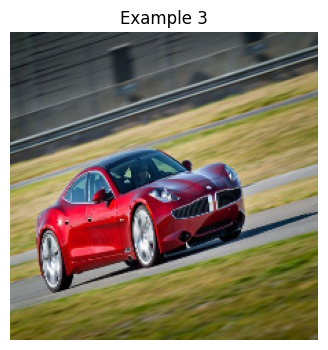

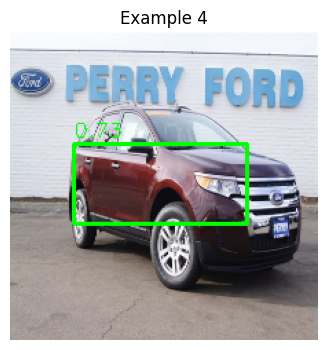

In [28]:
x_batch, y_true = val_gen[0]
y_pred = model.predict(x_batch)

def draw_boxes(img, pred, threshold=0.5, grid_size=7):
    img_h, img_w = img.shape[:2]
    for i in range(grid_size):
        for j in range(grid_size):
            conf = pred[i, j, 4]
            if conf > threshold:
                x, y, w, h = pred[i, j, :4]
                cx = int((j + x) * img_w / grid_size)
                cy = int((i + y) * img_h / grid_size)
                bw = int(w * img_w)
                bh = int(h * img_h)
                x1 = cx - bw//2
                y1 = cy - bh//2
                cv2.rectangle(img, (x1,y1), (x1+bw, y1+bh), (0,255,0), 2)
                cv2.putText(img, f"{conf:.2f}", (x1, y1-5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    return img

import matplotlib.pyplot as plt
for idx in range(2, 4):
    img = (x_batch[idx] * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    out = draw_boxes(img.copy(), y_pred[idx], threshold=0.5)
    plt.figure(figsize=(4,4))
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Example {idx+1}')
    plt.show()

Результат немного улучшился, но все еще далек от библиотечной реализации

# Результаты
|Модель|mAP|Recall|
|-|-|-|
|YOLO ultralytics|0.9620|0.8803|
|YOLO Custom|0.2274|0.0312|
|YOLO Custom ул.|0.2984|0.0516|

## Выводы
Кастомные реализации YOLO модели не смогли дать результаты как библиотечной реализации. Вероятно, причина в слишком простой архитектуре и малое количество эпох для обучения